# Module 

In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from src.config import criteo_csv_sep, criteo_df_cols, criteo_sparse_features, criteo_dense_features
from src.utils.plot_utils import count_plot
# from scripts.train_config import raw_data_dir
from sklearn.preprocessing import OneHotEncoder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Config 

In [7]:
criteo_data_dir = '../data/raw_criteo_data/train.txt'
# criteo_data_dir = '../data/debug/criteo//train.txt'

# Data Overview

In [8]:
df = pd.read_csv(criteo_data_dir,
                 nrows=2000000,
                 sep=criteo_csv_sep, 
                 header=None, names=criteo_df_cols)

KeyboardInterrupt: 

In [4]:
df.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,0,1.0,1,5.0,0.0,1382.0,4.0,15.0,2.0,181.0,...,e5ba7672,f54016b9,21ddcdc9,b1252a9d,07b5194c,NaN,3a171ecb,c5c50484,e8b83407,9727dd16
1,0,2.0,0,44.0,1.0,102.0,8.0,2.0,2.0,4.0,...,07c540c4,b04e4670,21ddcdc9,5840adea,60f6221e,NaN,3a171ecb,43f13e8b,e8b83407,731c3655
2,0,2.0,0,1.0,14.0,767.0,89.0,4.0,2.0,245.0,...,8efede7f,3412118d,NaN,NaN,e587c466,ad3062eb,3a171ecb,3b183c5c,NaN,NaN
3,0,NaN,893,NaN,NaN,4392.0,NaN,0.0,0.0,0.0,...,1e88c74f,74ef3502,NaN,NaN,6b3a5ca6,NaN,3a171ecb,9117a34a,NaN,NaN
4,0,3.0,-1,NaN,0.0,2.0,0.0,3.0,0.0,0.0,...,1e88c74f,26b3c7a7,NaN,NaN,21c9516a,NaN,32c7478e,b34f3128,NaN,NaN


In [7]:
df.shape

(2000000, 40)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 40 columns):
 #   Column  Dtype  
---  ------  -----  
 0   label   int64  
 1   I1      float64
 2   I2      int64  
 3   I3      float64
 4   I4      float64
 5   I5      float64
 6   I6      float64
 7   I7      float64
 8   I8      float64
 9   I9      float64
 10  I10     float64
 11  I11     float64
 12  I12     float64
 13  I13     float64
 14  C1      object 
 15  C2      object 
 16  C3      object 
 17  C4      object 
 18  C5      object 
 19  C6      object 
 20  C7      object 
 21  C8      object 
 22  C9      object 
 23  C10     object 
 24  C11     object 
 25  C12     object 
 26  C13     object 
 27  C14     object 
 28  C15     object 
 29  C16     object 
 30  C17     object 
 31  C18     object 
 32  C19     object 
 33  C20     object 
 34  C21     object 
 35  C22     object 
 36  C23     object 
 37  C24     object 
 38  C25     object 
 39  C26     object 
dtype

## Label Distribution 

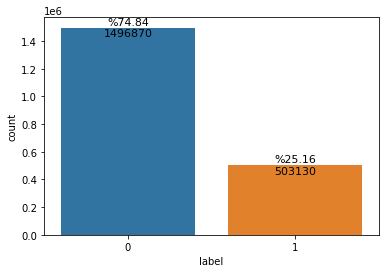

In [9]:
count_plot(df=df, col="label")

In [11]:
print(f"negative/positive: {round(74.84/25.16, 3)}")

negative/positive: 2.975


# Create debug data

In [24]:
df.to_csv("../data/debug/criteo/train.txt", index=False, header=None, sep=criteo_csv_sep)

# Debug 

In [35]:
from numpy import array

In [36]:
a = {'C1': array([1, 1]), 'C2': array([1, 2]), 'C3': array([2, 1]), 'C4': array([2, 1]), 'C5': array([1, 1]), 'C6': array([1, 2]), 'C7': array([2, 1]), 'C8': array([2, 1]), 'C9': array([1, 1]), 'C10': array([2, 1]), 'C11': array([2, 1]), 'C12': array([1, 2]), 'C13': array([1, 2]), 'C14': array([1, 2]), 'C15': array([1, 2]), 'C16': array([1, 2]), 'C17': array([2, 1]), 'C18': array([2, 1]), 'C19': array([1, 1]), 'C20': array([2, 1]), 'C21': array([1, 2]), 'C22': array([1, 1]), 'C23': array([1, 1]), 'C24': array([2, 1]), 'C25': array([1, 1]), 'C26': array([2, 1]), 'I1': array([1., 2.]), 'I2': array([1, 0]), 'I3': array([ 5., 44.]), 'I4': array([0., 1.]), 'I5': array([1382.,  102.]), 'I6': array([4., 8.]), 'I7': array([15.,  2.]), 'I8': array([2, 2]), 'I9': array([181.,   4.]), 'I10': array([1., 1.]), 'I11': array([2., 1.]), 'I12': array([0., 0.]), 'I13': array([2., 4.])}

b = {'C1': array([1, 1]), 'C2': array([1, 2]), 'C3': array([2, 1]), 'C4': array([2, 1]), 'C5': array([1, 1]), 'C6': array([1, 2]), 'C7': array([2, 1]), 'C8': array([2, 1]), 'C9': array([1, 1]), 'C10': array([2, 1]), 'C11': array([2, 1]), 'C12': array([1, 2]), 'C13': array([1, 2]), 'C14': array([1, 2]), 'C15': array([1, 2]), 'C16': array([1, 2]), 'C17': array([2, 1]), 'C18': array([2, 1]), 'C19': array([1, 1]), 'C20': array([2, 1]), 'C21': array([1, 2]), 'C22': array([1, 1]), 'C23': array([1, 1]), 'C24': array([2, 1]), 'C25': array([1, 1]), 'C26': array([2, 1]), 'I1': array([1., 2.]), 'I2': array([1, 0]), 'I3': array([ 5., 44.]), 'I4': array([0., 1.]), 'I5': array([1382.,  102.]), 'I6': array([4., 8.]), 'I7': array([15.,  2.]), 'I8': array([2, 2]), 'I9': array([181.,   4.]), 'I10': array([1., 1.]), 'I11': array([2., 1.]), 'I12': array([0., 0.]), 'I13': array([2., 4.])}


In [39]:
a.keys() == b.keys()

True

In [41]:
a.values() == b.values()

False

In [45]:
sum(a['C1'] == b['C1'])

2

In [50]:
for key in a.keys():
    print(key)
    match = a[key] == b[key]
    match_sum = sum(match)
    print(match)
    if match_sum != 2:
        print('hh')

C1
[ True  True]
C2
[ True  True]
C3
[ True  True]
C4
[ True  True]
C5
[ True  True]
C6
[ True  True]
C7
[ True  True]
C8
[ True  True]
C9
[ True  True]
C10
[ True  True]
C11
[ True  True]
C12
[ True  True]
C13
[ True  True]
C14
[ True  True]
C15
[ True  True]
C16
[ True  True]
C17
[ True  True]
C18
[ True  True]
C19
[ True  True]
C20
[ True  True]
C21
[ True  True]
C22
[ True  True]
C23
[ True  True]
C24
[ True  True]
C25
[ True  True]
C26
[ True  True]
I1
[ True  True]
I2
[ True  True]
I3
[ True  True]
I4
[ True  True]
I5
[ True  True]
I6
[ True  True]
I7
[ True  True]
I8
[ True  True]
I9
[ True  True]
I10
[ True  True]
I11
[ True  True]
I12
[ True  True]
I13
[ True  True]


# Playground 

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [10]:
df = pd.read_csv(criteo_data_dir,
                 nrows=2000,
                 sep=criteo_csv_sep, 
                 header=None, names=criteo_df_cols)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   2000 non-null   int64  
 1   I1      1110 non-null   float64
 2   I2      2000 non-null   int64  
 3   I3      1551 non-null   float64
 4   I4      1580 non-null   float64
 5   I5      1907 non-null   float64
 6   I6      1506 non-null   float64
 7   I7      1907 non-null   float64
 8   I8      1998 non-null   float64
 9   I9      1907 non-null   float64
 10  I10     1110 non-null   float64
 11  I11     1907 non-null   float64
 12  I12     445 non-null    float64
 13  I13     1580 non-null   float64
 14  C1      2000 non-null   object 
 15  C2      2000 non-null   object 
 16  C3      1934 non-null   object 
 17  C4      1934 non-null   object 
 18  C5      2000 non-null   object 
 19  C6      1749 non-null   object 
 20  C7      2000 non-null   object 
 21  C8      2000 non-null   object 
 22  

In [14]:
df[criteo_dense_features].describe()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13
count,1110.000000,2000.000000,1551.000000,1580.000000,1.907000e+03,1506.000000,1907.000000,1998.000000,1907.000000,1110.000000,1907.000000,445.000000,1580.000000
mean,3.696396,120.284500,33.058027,8.063924,1.468667e+04,146.925631,13.703199,13.678679,126.696906,0.561261,2.155742,1.042697,11.783544
std,9.656064,427.538589,243.818066,9.711368,5.424004e+04,337.963575,53.453808,22.943790,276.617097,0.632266,3.544704,5.289414,26.553803
min,0.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,2.000000,2.975000e+02,10.000000,0.000000,2.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,3.000000,6.000000,4.000000,2.885000e+03,43.000000,3.000000,8.000000,43.000000,0.000000,1.000000,0.000000,5.000000
75%,3.000000,43.250000,19.000000,11.000000,1.032550e+04,139.750000,10.000000,20.750000,128.500000,1.000000,2.000000,1.000000,14.000000
max,95.000000,7864.000000,8457.000000,87.000000,1.015215e+06,4638.000000,1658.000000,547.000000,5637.000000,4.000000,37.000000,98.000000,770.000000


In [15]:
from sklearn.preprocessing import KBinsDiscretizer

In [18]:
df = df.fillna(0)

In [37]:
result = KBinsDiscretizer(n_bins=20, encode='ordinal').fit_transform(df[['I5']])#.toarray()

/Users/mac/opt/miniconda3/envs/rec_sys/lib/python3.6/site-packages/sklearn/preprocessing/_discretization.py:222: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


In [38]:
result.shape

(2000, 1)

In [39]:
result

array([[ 6.],
       [ 3.],
       [ 6.],
       ...,
       [18.],
       [ 9.],
       [17.]])

In [27]:
numeric_features = criteo_dense_features #["age", "fare"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", StandardScaler())
          ]
)

categorical_features = criteo_sparse_features #["embarked", "sex", "pclass"]
categorical_transformer = Pipeline([
    ('one_hot', OneHotEncoder(handle_unknown="ignore"))
    , ('pca', TruncatedSVD(n_components=50))
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [28]:
X = df[criteo_dense_features+criteo_sparse_features]
y = df['label']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

(1600, 39)
model score: 0.802


In [31]:
a = preprocessor.transform(X_train)

In [36]:
pd.DataFrame(a).describe()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,4.773959e-17,-8.881784e-18,-4.440892e-18,2.220446e-17,1.332268e-17,-1.720846e-17,-4.440892e-18,2.442491e-17,-1.554312e-17,1.332268e-17,...,0.005130,0.001776,-0.001313,0.002881,0.003309,-0.005871,-0.000633,0.003660,0.000518,0.004804
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,...,0.273444,0.269879,0.268025,0.264950,0.259948,0.255594,0.253620,0.252040,0.249510,0.247086
min,-3.553724e-01,-2.825749e-01,-2.151578e-01,-8.108696e-01,-2.546469e-01,-4.360406e-01,-2.576937e-01,-6.628086e-01,-4.586720e-01,-5.728168e-01,...,-0.884698,-0.990684,-0.902642,-0.996002,-1.064303,-0.836404,-0.947139,-0.646846,-0.986485,-1.200074
25%,-3.553724e-01,-2.781845e-01,-1.873056e-01,-5.862519e-01,-2.485435e-01,-3.707450e-01,-2.380299e-01,-5.672298e-01,-4.155170e-01,-5.728168e-01,...,-0.166568,-0.149090,-0.161239,-0.162423,-0.143648,-0.152327,-0.143057,-0.158258,-0.150085,-0.150909
50%,-2.076084e-01,-2.737940e-01,-1.594535e-01,-3.616343e-01,-2.137602e-01,-2.764292e-01,-1.987024e-01,-2.804937e-01,-2.968409e-01,-5.728168e-01,...,-0.007804,0.012662,-0.007370,-0.001009,0.002177,0.010621,0.004710,-0.014792,-0.010237,-0.011205
75%,-2.076084e-01,-1.859845e-01,-9.446517e-02,8.760087e-02,-8.704703e-02,-9.142512e-02,-6.105600e-02,3.407680e-01,-1.948716e-03,1.224256e+00,...,0.166741,0.162068,0.160574,0.156023,0.154631,0.135561,0.155839,0.138833,0.145659,0.141407
max,1.264786e+01,1.698515e+01,2.581731e+01,8.959996e+00,1.857870e+01,1.101245e+01,3.234483e+01,2.084240e+01,1.981337e+01,6.615472e+00,...,0.898329,1.205812,1.013552,1.006429,1.243221,0.872545,0.951110,1.392748,1.023047,1.200330
